In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.test.gpu_device_name() #run to make sure tensorflow is connected to gpu

import numpy as np
import pandas as pd
import cv2  
import os  
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show

imageData=[]
labelData=[]

for i, img in tqdm(enumerate(os.listdir('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/cards/cards/'))):
    label=i
    
    img = cv2.imread('C:/Users/nmb20/UNiversities/Projects/Hackathon/UOttaHack6/ML-Blackjack/ML-Blackjack/cards/cards/'+img, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (180, 180))
    imgs = img.reshape((1, img.shape[0], img.shape[1], 1))
    data_generator = ImageDataGenerator(rotation_range=45, brightness_range=(0.8, 1.2), zoom_range=[.5, .7])
    data_generator.fit(imgs)
    image_iterator = data_generator.flow(imgs)
    
    for x in range(150):
        img_transformed=image_iterator.next()[0].astype('int')/255
        imageData.append(img_transformed)
        labelData.append(label)

zipped=list(zip(imageData,labelData))

shuffle(zipped)

imageData, labelData = zip(*zipped)

imageDataT = imageData[7020:]
labelDataT = labelData[7020:]

imageData = imageData[:7020]
labelData = labelData[:7020]


52it [00:19,  2.70it/s]


In [5]:
train_images = []
train_ids = []
for i in range(len(imageData)):
    train_images.append(imageData[i])
    train_ids.append(labelData[i])

train_images = np.array(train_images)
train_ids = np.array(train_ids, dtype=float)  # Convert labels to floats

print(len(train_images))
print(len(train_ids))

test_images = []
test_ids = []
for i in range(len(imageDataT)):
    test_images.append(imageDataT[i])
    test_ids.append(labelDataT[i])

test_images = np.array(test_images)
test_ids = np.array(test_ids, dtype=float)

print(len(test_images))
print(len(test_ids))

print('success')

tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

epochs=25
batch_size=32

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(train_images.shape[1], train_images.shape[2], train_images.shape[3])),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(53, activation='softmax')
])

model.summary()

cp = tf.keras.callbacks.ModelCheckpoint(filepath="250epochs_conv.h5",
                               save_best_only=True,
                               verbose=0)



model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_images, train_ids, epochs=epochs, batch_size=batch_size, validation_data=(test_images, test_ids), callbacks=[cp]).history



7020
7020
780
780
success


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin 

C:\Users\nmb20\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


220/220 [==============================] - 115s 521ms/step - loss: 0.0740 - accuracy: 0.9839 - val_loss: 0.0096 - val_accuracy: 0.9974
Epoch 3/25
220/220 [==============================] - 111s 505ms/step - loss: 0.0273 - accuracy: 0.9927 - val_loss: 3.0738e-04 - val_accuracy: 1.0000
Epoch 4/25
220/220 [==============================] - 102s 465ms/step - loss: 0.0127 - accuracy: 0.9967 - val_loss: 0.0028 - val_accuracy: 0.9987
Epoch 5/25
220/220 [==============================] - 105s 479ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.0034 - val_accuracy: 0.9987
Epoch 6/25
220/220 [==============================] - 109s 494ms/step - loss: 2.0381e-04 - accuracy: 1.0000 - val_loss: 4.6898e-06 - val_accuracy: 1.0000
Epoch 7/25
220/220 [==============================] - 111s 503ms/step - loss: 3.3175e-04 - accuracy: 0.9999 - val_loss: 3.6471e-06 - val_accuracy: 1.0000
Epoch 8/25
220/220 [==============================] - 107s 488ms/step - loss: 0.0074 - accuracy: 0.9983 - val_loss:

25/25 [==============================] - 3s 112ms/step


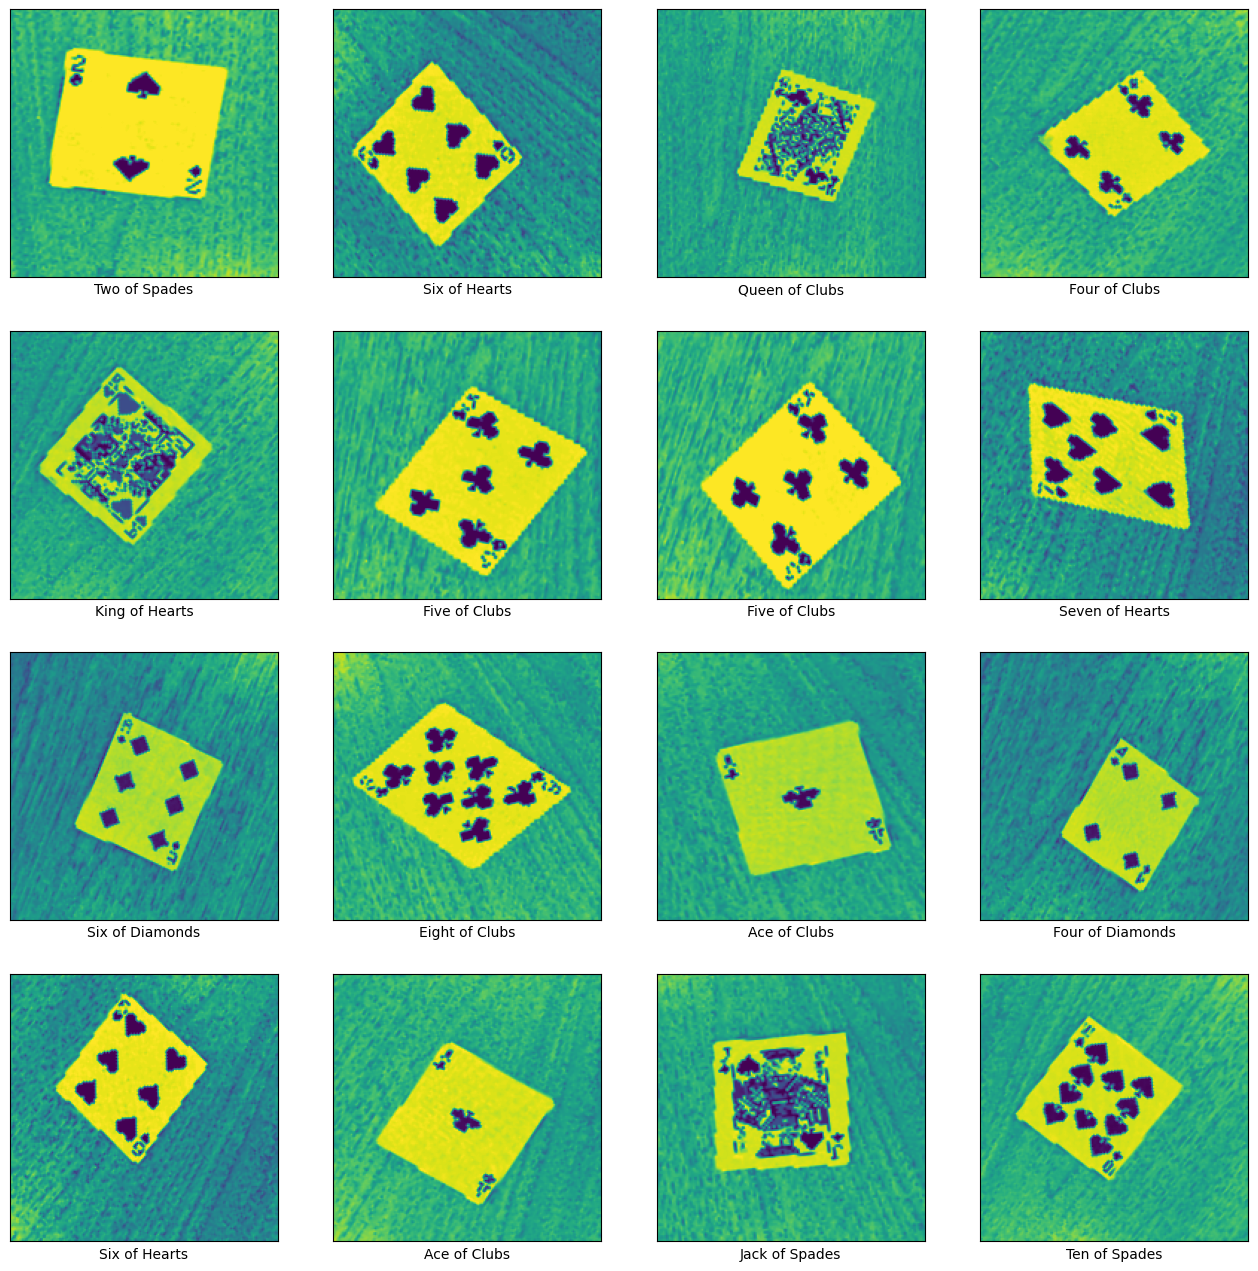

INFO:tensorflow:Assets written to: goodModeLastModel22\assets


INFO:tensorflow:Assets written to: goodModeLastModel22\assets


In [6]:
card_map = {
    0: "Eight of Hearts",
    1: "Three of Diamonds",
    2: "Three of Clubs",
    3: "Nine of Spades",
    4: "Four of Diamonds",
    5: "Six of Diamonds",
    6: "Queen of Clubs",
    7: "Eight of Diamonds",
    8: "King of Spades",
    9: "Three of Hearts",
    10: "Jack of Diamonds",
    11: "Five of Hearts",
    12: "Six of Clubs",
    13: "Nine of Hearts",
    14: "Four of Clubs",
    15: "Jack of Clubs",
    16: "Five of Diamonds",
    17: "Seven of Clubs",
    18: "King of Hearts",
    19: "Ten of Spades",
    20: "Two of Spades",
    21: "Nine of Clubs",
    22: "Two of Diamonds",
    23: "Three of Spades",
    24: "Eight of Spades",
    25: "Two of Hearts",
    26: "Two of Clubs",
    27: "Ace of Hearts",
    28: "Queen of Diamonds",
    29: "Jack of Hearts",
    30: "Ten of Hearts",
    31: "Seven of Diamonds",
    32: "Jack of Spades",
    33: "Queen of Spades",
    34: "Four of Hearts",
    35: "Six of Hearts",
    36: "Seven of Hearts",
    37: "Four of Spades",
    38: "Ten of Clubs",
    39: "Six of Spades",
    40: "Eight of Clubs",
    41: "Ten of Diamonds",
    42: "Five of Clubs",
    43: "Ace of Clubs",
    44: "King of Clubs",
    45: "King of Diamonds",
    46: "Nine of Diamonds",
    47: "Ace of Spades",
    48: "Five of Spades",
    49: "Seven of Spades",
    50: "Ace of Diamonds",
    51: "Queen of Hearts"
}

predictions=model.predict(test_images)
sample=test_images[:16]

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample[i].reshape(sample.shape[1], sample.shape[2]))
    biggestIndex=-1
    biggest=0
    for j in range(52):
        if predictions[i][j] > biggest:
            biggest = predictions[i][j]
            biggestIndex = j
    plt.xlabel(card_map[biggestIndex])
plt.show()

model.save('goodModeLastModel22')
